# A Manual of Instructional Problems for the U.S.G.S Modflow Model

# Problem 1: The Theis Solution

### Table 1.1 Parameters used in Problem 1

| First Header               | Second Header   |
|----------------------------|-----------------|
| Initial head               | 0.0 m           |
| Transmissivity             | 0.0023 $\frac{m^2}{s}$    |
| Storage coefficient        | 0.00075         |
| Pumping rate               | ${4 x 10^{-3}} \frac{m^3}{s}$ |
| Final time                 | 86400 s         |
| Number of time steps       | 20              |
| Time step expansion factor | 1.3             |
| Iteration parameters       | 5               |
| Closure criterion          | 0.0001          |
| Maximum number iterations  | 50              |

In [5]:
#Import and modules/packages that we need to work with
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy
import scipy.special

In [1]:
#Store the values of each parameter into separate variables
#we are storing the values as strings so that we can print them out later
inh = (str(0.0) + ' m') #initial head
trans = (str(0.0023) + ' m^2/s') #transmissivity
sc = (str(0.00075)) #storage coefficient
pr = (str(4) + 'x' + (str(10) + '^-' + (str(3) + ' m^3/s'))) #pumping rate
ft = (str(86400) + 's') #final time
num_of_ts = (str(20)) #number of time steps
ts_exp_fact = (str(1.3)) #time step expansion factor
it = (str(5)) #iteration parameters
cc = (str(0.0001)) #closure criterion
max_num_of_it = (str(50)) #maximum number of iterations

#here I am showing you a different and more efficient way to simply print out the parameter values
# the '\n' means to indent to a new line when it prints out the text
print (inh + '\n' + trans + '\n' + sc + '\n' + pr + '\n' + ft + '\n' + num_of_ts + '\n' + 
       ts_exp_fact + '\n' + it + '\n' + cc + '\n' + max_num_of_it)

0.0 m
0.0023 m^2/s
0.00075
4x10^-3 m^3/s
86400s
20
1.3
5
0.0001
50


### Table 1.2 Grid spacing used for Part c model configurations


| Row number (i) (=column number (j)) | Part c |
|-------------------------------------|--------|
| 1                                   | 1      |
| 2                                   | 1.413  |
| 3                                   | 2      |
| 4                                   | 2.83   |
| 5                                   | 4      |
| 6                                   | 5.65   |
| 7                                   | 8      |
| 8                                   | 11.3   |
| 9                                   | 12     |
| 10                                  | 14.62  |
| 11                                  | 20     |
| 12                                  | 28.3   |
| 13                                  | 40     |
| 14                                  | 56.5   |
| 15                                  | 80     |
| 16                                  | 110    |
| 17                                  | 150    |
| 18                                  | 200    |
| 19                                  | 252.89 |

In [7]:
print(os.getcwd())
delr = [] #creates an empty list
f = open('../Data/table1.2c.csv') #opens the csv file
for i,line in enumerate(f): 
    if i == 0: 
        continue 
    linelist = line.strip().split(',') 
    value = float(linelist[1]) #changes the values in the list to floats
    print(value) #prints the values
    delr.append(value) #puts the floats into the empty list, delr 
    
print(delr) #prints the list

C:\VT\USGS Internship\modflow_epa.git\Notebooks
1.0
1.413
2.0
2.83
4.0
5.65
8.0
11.3
12.0
14.62
20.0
28.3
40.0
56.5
80.0
110.0
150.0
200.0
252.89
[1.0, 1.413, 2.0, 2.83, 4.0, 5.65, 8.0, 11.3, 12.0, 14.62, 20.0, 28.3, 40.0, 56.5, 80.0, 110.0, 150.0, 200.0, 252.89]


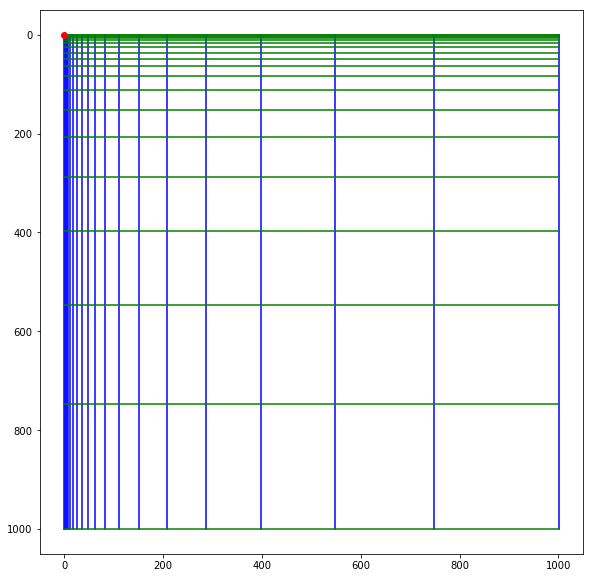

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
delr_array = np.array(delr) #changes delr values from float to array
ymax = delr_array.sum() #assigns the sum of the list to ymax
ymin = 0
xmax = ymax #makes xmax equal to ymax which is equal to the sum of the list
xmin = 0
x = 0
y = 0

plt.plot([xmin, xmin], [ymin, ymax], 'b-') #plots the first column line. Must be outside of the loop

for dx in delr: #dx will go through the values in delr one by one in the loop
    x = x + dx #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x, x], [ymax, ymin], 'b-') #plot that point and then loop back to top


plt.plot([xmin, xmax], [ymin, ymin], 'g-') #plots the first row line. Must be outside of the loop

for dy in delr: 
    y = y + dy
    plt.plot([xmin, xmax], [y, y], 'g-')
    plt.gca().invert_yaxis() #there is an error that occurs here, use the invert yaxis in order to correct the grid lines
    
def plot_well(xmin, ymin, sym):
    plt.plot(xmin, ymin, sym)
plot_well(xmin, ymin, sym='ro')

## Part c
_Re-run part b with the grid spacing shown in Table 1.2. The overall model domain is the same size as part b, but grid spacing is finer near the pumping well. Run the model and note drawdown at each time step at an observation point 55 m from the pumping well._

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
delr_array = np.array(delr) #changes delr values from float to array
print (delr_array) #prints those values
print (delr_array.sum()) #prints the sum of those values
ymax = delr_array.sum() #assigns the sum of the list to ymax
ymin = 0
xmax = ymax #makes xmax equal to ymax which is equal to the sum of the list
xmin = 0
x = 0
y = 0
xmean = delr_array.sum() * .5
ymean = delr_array.sum() * .5

plt.plot([xmin, xmin], [ymin, ymax], 'b-') #plots the first column line. Must be outside of the loop

for dx in delr: #dx will go through the values in delr one by one in the loop
    x = x + dx #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x, x], [ymin, ymax], 'b-') #plot that point and then loop back to top
    
    #repeat the process above but with the y values to make the rows
plt.plot([xmin, xmax], [ymin, ymin], 'g-') #plots the first row line. Must be outside of the loop

for dy in delr: 
    y = y + dy
    plt.plot([xmin, xmax], [y, y], 'g-')
    plt.gca().invert_yaxis()

def plot_well(xmin, ymax, sym):
    plt.plot(xmin, ymax, sym)
plot_well(xmin, ymin, sym='ro')

### Table 1.1 Parameters used in Problem 1c

| Variable | Value   |
|----------------------------|-----------------|
| Initial head               | 0.0 m           |
| Transmissivity             | 0.0023 m^2/s    |
| Storage coefficient        | 0.00075         |
| Pumping rate               | 4 x 10^-3 * .25 m^3/s |
| Final time                 | 1000.503 s      |
| Number of time steps       | 20              |
| Time step expansion factor | 1.3             |
| iteration parameters       | 5               |
| Closure criterion          | 0.0001          |
| Maximum number iterations  | 50              |

In [2]:
#Store the values of each parameter into separate variables
inh = 0.0 #initial head
trans = 23.e-4 #transmissivity (is equal to hk*(top-botm))
ss = 0.00075 #storage coefficient
pr = 4.e-3 * .25 #pumping rate
perlen = 86400 #final time (period length)
nstp = 20 #number of time steps
tsmult = 1.3 #time step expansion factor (time step multiplier)
it = 5 #iteration parameters
hclose = 1.e-4 #closure criterion (the head change criterion for convergence)
mxiter = 50 #maximum number of iterations
nlay = 1 #number of layers
nrow = 19 #number of rows
ncol = 19 #number of columns

In [ ]:
#Flopy objects
modelname = 'p1_pc' #short for problem 1 part c
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws = 'temp'
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws = model_ws)

In [ ]:
#call in the discretization package (DIS)
delr = delr
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

In [ ]:
#call in the basic package (BAS)
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

In [ ]:
#call in the well package (WEL)
# Remember to use zero-based layer, row, column indices!
wel_sp1 = [[0, 0, 0, -pr]]
stress_period_data = {0: wel_sp1}
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)

In [ ]:
#call in the preconditioned conjugate-gradient package (PCG) 
pcg = flopy.modflow.ModflowPcg(mf, mxiter=mxiter, hclose=hclose)

In [ ]:
#call in the layer-propery flow (LPF)
hk = trans
ss = 75e-5
laytyp = np.zeros((nlay))
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, ss=ss, laytyp=laytyp)

In [ ]:
#call in the output control package (OC)
oc = flopy.modflow.ModflowOc(mf)

In [ ]:
# Write the MODFLOW model input files
mf.write_input()

In [ ]:
# Run the MODFLOW model
success, buff = mf.run_model()

### Post processing the results
_Now that we have successfully built and run our MODFLOW model, we can look at the results. MODFLOW writes the simulated heads to a binary data output file. We cannot look at these heads with a text editor, but flopy has a binary utility that can be used to read the heads. The following statements will read the binary head file and create a plot of simulated heads for layer 1:_

In [ ]:
import flopy.utils.binaryfile as bf

# Create the headfile object
fname = os.path.join(model_ws, 'p1_pc.hds')
headobj = bf.HeadFile(fname)
times = headobj.get_times()
print(times)

In [ ]:
# Plot the drawdown versus time
idx = (0, 0, 2)
ts = headobj.get_ts(idx)
plt.subplot(1, 1, 1)
ttl = 'Head at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1)
plt.title(ttl)
plt.xlabel('time (s)')
plt.ylabel('drawdown (m)')
plt.plot(ts[:, 0], 0-ts[:, 1], 'bo-')
plt.xlim(0, ts[:, 0].max())
plt.legend(['refined quadrant'], loc='best')

In [ ]:
# Plot the head versus time
idx = (0, 0, 2)
ts = headobj.get_ts(idx)
plt.subplot(1, 1, 1)
ttl = 'Head at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1)
plt.title(ttl)
plt.xlabel('time (s)')
plt.ylabel('head')
plt.plot(ts[:, 0], ts[:, 1], 'ro-')
plt.xlim(0, ts[:, 0].max())
plt.legend(['refined quadrant'], loc='best')

# Theis Equation

$$s = \frac{Q}{(4{\pi}T)} \cdot W(u)$$

where:

**s** = drawdown

**Q** = pumping rate

**T** = Transmissivity

**S** = Storage

**r** = radius (the distance from the well to where you want to measure drawdown)

$$u = \frac{r^2S}{4Tt}$$

In [ ]:
def u_calc(r, S, T, t):
    u = r ** 2 * S / 4. / T / t
    return u

def well_function(u):
    return scipy.special.exp1(u)

def drawdown(Q, r, S, T, t):
    u = u_calc(r, S, T, t)
    s = Q / 4. / np.pi / T * well_function(u)
    return s

def distance(x, y, xp, yp):
    return np.sqrt((x - xp) ** 2 + (y - yp) ** 2)

In [ ]:
# Plot the drawdown versus time using the formula for drawdown
plt.subplot(1, 1, 1)
ttl = 'Drawdown at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1) #we are adding 1 to each part of idx so that 
#it prints out the real values and not the code values
plt.title(ttl) #prints/plots title
plt.xlabel('time (s)') #labels the x-axis
plt.ylabel('drawdown (m)') #labels the y-axis

d=drawdown(Q=0.004, r=55, S=0.00075, T=0.0023, t=ts[:, 0])
    
plt.plot(ts[:, 0], 0-ts[:, 1], 'bo-') #(x, y, color/type of line)
#here we do "0-ts" to make the values negative because drawdown is showing the water levels DECREASE
plt.xlim(0, ts[:, 0].max())